In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

c:\Users\Jakob\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
#Define period
start = dt.datetime(2018,1,1)        
end = dt.datetime(2022, 11, 11) 

In [3]:
#Define the cryptocurrencies and Treasury yield
symbols = ['BTC-USD', 'ETH-USD', 'XRP-USD', 
           'LTC-USD', '^CMC200', '^TNX']

#Bitcoin, Etherium, Ripple, Litecoin, CMC Crypto 200 Index by Solacti, 10 yr treasury yield respectfuly

#Define source API as yahoo
source = 'yahoo'

#Retrieve the data, specificaly the closing prices
data = web.DataReader(symbols, source, start, end)['Adj Close']

#Show data
data.head()

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD,^CMC200,^TNX
Date,,,,,,
2018-01-01,13657.200195,772.640991,2.39103,229.033005,NaN,NaN
2018-01-02,14982.099609,884.443970,2.48090,255.684006,NaN,2.465
2018-01-03,15201.000000,962.719971,3.10537,245.367996,NaN,2.447
2018-01-04,15599.200195,980.921997,3.19663,241.369995,NaN,2.453
2018-01-05,17429.500000,997.719971,3.04871,249.270996,NaN,2.476


In [21]:
# SAVING A DATAFRAME WITH PARQUET 
data.to_parquet('data_small.parquet',compression='BROTLI')

In [22]:
data_normal = pd.read_parquet('data_small.parquet')

In [23]:
data_normal

Symbols,BTC,ETH,XRP,LTC,CMC200,TNX
Date,,,,,,
2018-01-01,13657.200195,772.640991,2.391030,229.033005,NaN,NaN
2018-01-02,14982.099609,884.443970,2.480900,255.684006,NaN,2.465
2018-01-03,15201.000000,962.719971,3.105370,245.367996,NaN,2.447
2018-01-04,15599.200195,980.921997,3.196630,241.369995,NaN,2.453
2018-01-05,17429.500000,997.719971,3.048710,249.270996,NaN,2.476
...,...,...,...,...,...,...
2022-11-08,18541.271484,1332.835571,0.406242,57.391804,430.834015,4.126
2022-11-09,15880.780273,1100.169800,0.333181,50.658577,364.075012,4.151
2022-11-10,17586.771484,1299.464600,0.395705,60.361053,413.752014,3.829


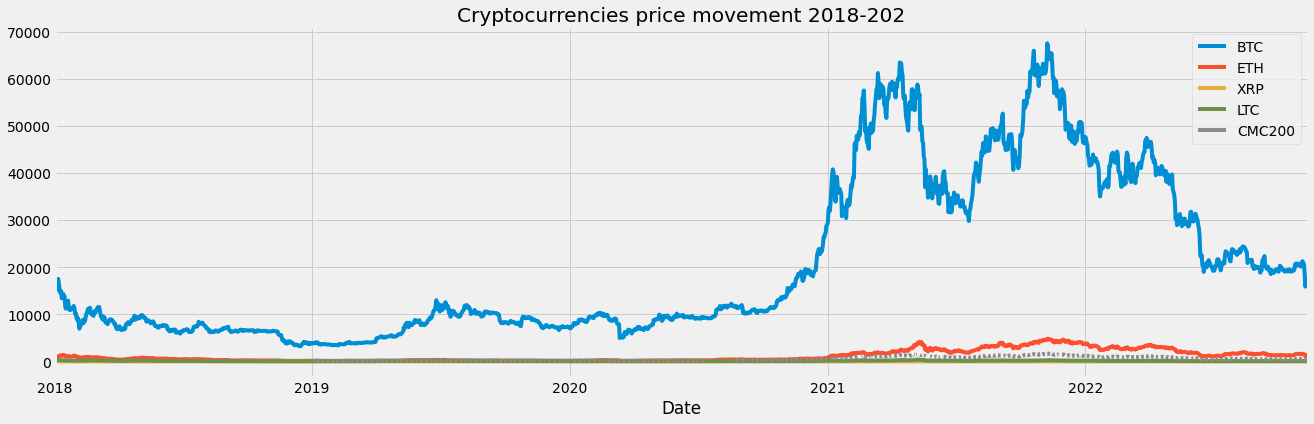

In [4]:
#Rename the symbols so we can call them more easily. The ^ makes it hard to reference the Treasury yield
data.rename(columns = {'^CMC200':'CMC200', '^TNX':'TNX', 'BTC-USD':'BTC', 'ETH-USD':'ETH', 'XRP-USD':'XRP', 'LTC-USD':'LTC'}, inplace = True)
data.loc[:, data.columns!='TNX'].plot.line(figsize=(20,6), grid = True, title='Cryptocurrencies price movement 2018-202') #Excluding TNX


plt.legend()


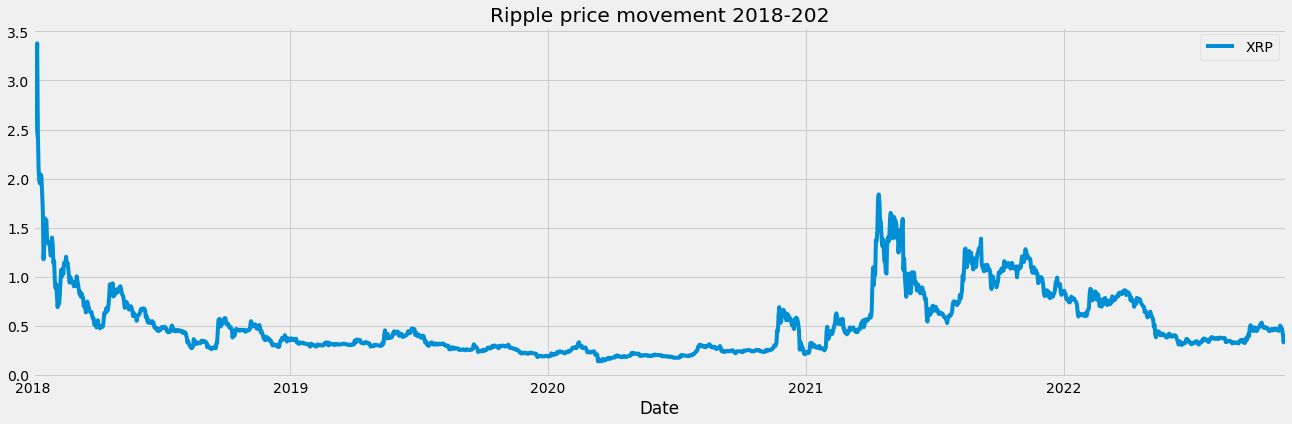

In [5]:
#Plot XRP price movement
data['XRP'].plot.line(figsize=(20,6), grid = True, title='Ripple price movement 2018-202') #Ripple
plt.legend()

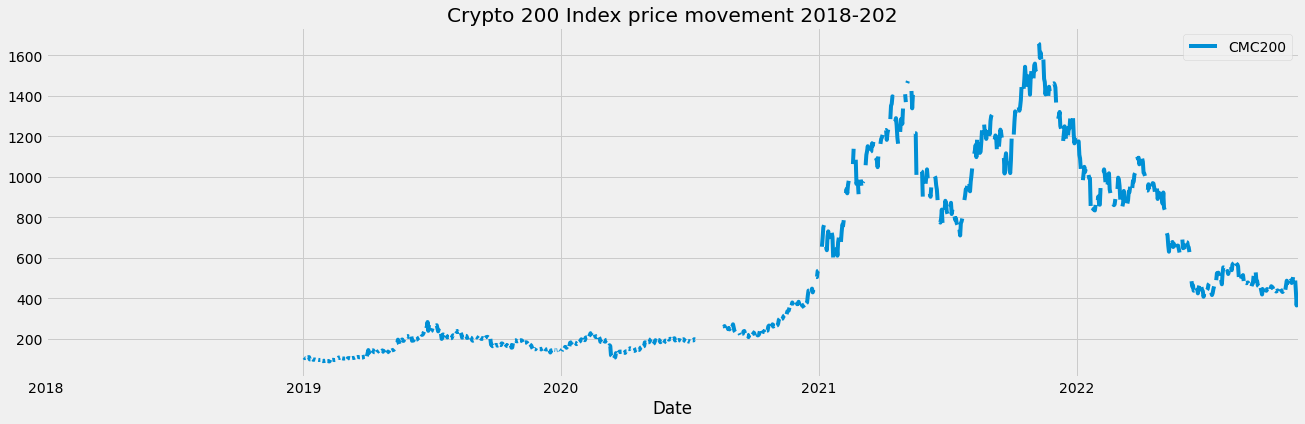

In [6]:
#Plot CMC200 price movement
data['CMC200'].plot.line(figsize=(20,6), grid = True, title='Crypto 200 Index price movement 2018-202') 
plt.legend()

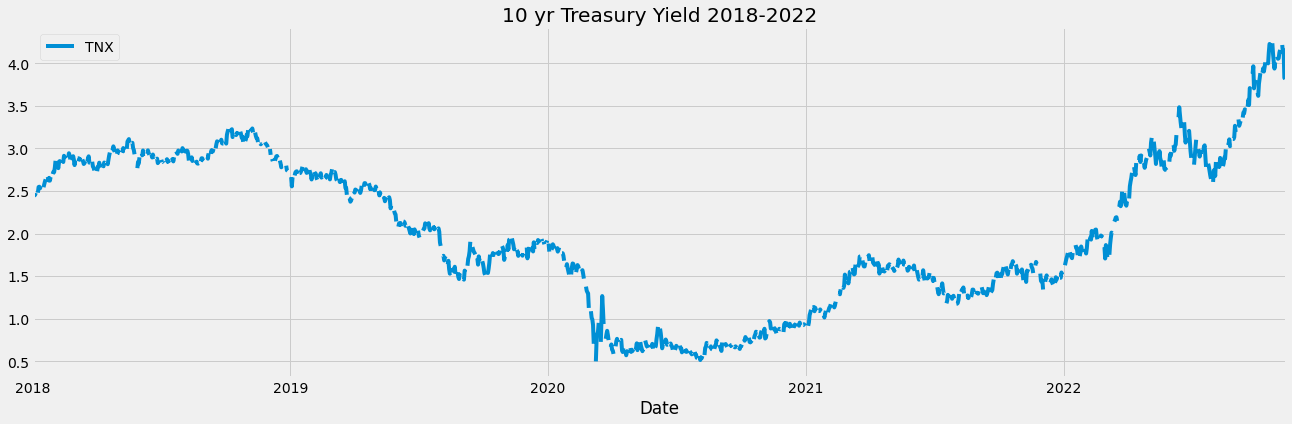

In [7]:
#Plot TNX price movement
data['TNX'].plot.line(figsize=(20,6), grid = True, title='10 yr Treasury Yield 2018-2022') #Treasury Yield 10 Years
plt.legend()

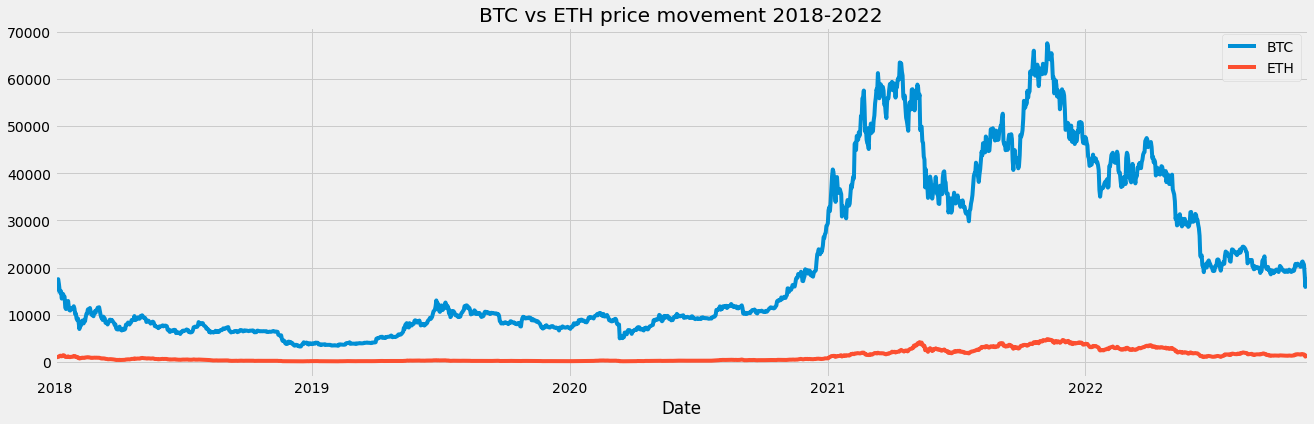

In [8]:
#Plot BTC & ETH price movement
data['BTC'].plot.line(figsize=(20,6), grid = True, title='BTC vs ETH price movement 2018-2022')
data['ETH'].plot.line(figsize=(20,6), grid = True, title='BTC vs ETH price movement 2018-2022')
plt.legend()

In [9]:
#Replacing Null values into zeros
data.fillna(0) 

#When changing the data into percantages there will be NaN values so we have to clean that up also
data_pct = data.pct_change(periods=1).dropna()

#show the transformed data
data_pct.head()

Symbols,BTC,ETH,XRP,LTC,CMC200,TNX
Date,,,,,,
2019-01-01,0.026938,0.055869,0.034207,0.049616,0.000000,0.000000
2019-01-02,0.025989,0.101039,0.028708,0.045458,0.072100,-0.009308
2019-01-03,-0.027050,-0.038135,-0.040025,-0.042083,-0.032740,-0.040210
2019-01-04,0.005467,0.036523,-0.009652,0.011786,0.007522,0.041112
2019-01-05,-0.003246,0.006836,-0.004126,0.078160,0.000000,0.000000


In [27]:
# SAVING A DATAFRAME WITH PARQUET 
data_pct.to_parquet('data_adjusted_small.parquet',compression='BROTLI')

In [28]:
data_adj = pd.read_parquet('data_adjusted_small.parquet')

In [29]:
data_adj

Symbols,BTC,ETH,XRP,LTC,CMC200,TNX
Date,,,,,,
2019-01-01,0.026938,0.055869,0.034207,0.049616,0.000000,0.000000
2019-01-02,0.025989,0.101039,0.028708,0.045458,0.072100,-0.009308
2019-01-03,-0.027050,-0.038135,-0.040025,-0.042083,-0.032740,-0.040210
2019-01-04,0.005467,0.036523,-0.009652,0.011786,0.007522,0.041112
2019-01-05,-0.003246,0.006836,-0.004126,0.078160,0.000000,0.000000
...,...,...,...,...,...,...
2022-11-08,-0.100061,-0.150298,-0.127968,-0.151665,-0.116124,-0.020883
2022-11-09,-0.143490,-0.174564,-0.179846,-0.117320,-0.154953,0.006059
2022-11-10,0.107425,0.181149,0.187658,0.191527,0.136447,-0.077572


<AxesSubplot:xlabel='Symbols'>

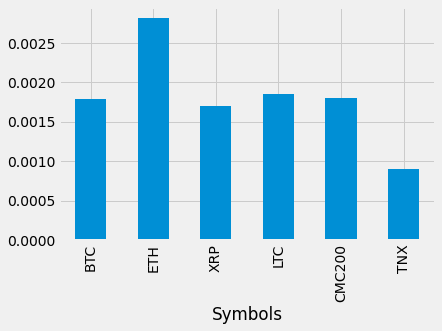

In [30]:
#mean of each financial instrument
data_adj.mean()

data_adj.mean().plot.bar()

<AxesSubplot:xlabel='Symbols'>

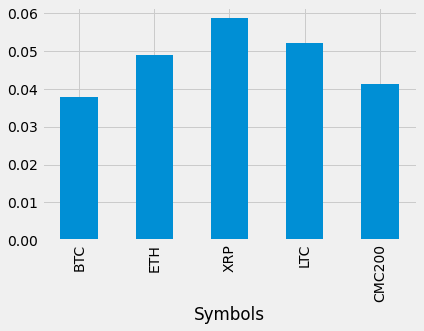

In [31]:
#Standard deviation for each of the cryptocurrencies
data_adj.loc[:, data.columns!='TNX'].std().plot.bar()

In [32]:
#Mean Absolute Deviation 
data_adj.loc[:, data.columns!='TNX'].mad()

Symbols
BTC       0.025392
ETH       0.034060
XRP       0.035394
LTC       0.036010
CMC200    0.022146
dtype: float64

<AxesSubplot:ylabel='Symbols'>

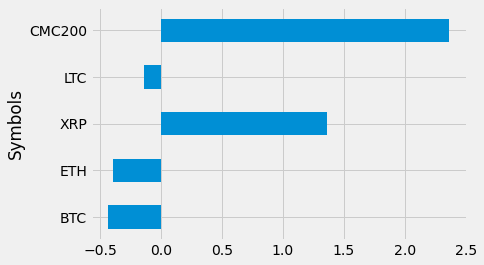

In [33]:
#Skewness
data_adj.loc[:, data.columns!='TNX'].skew().plot.barh()

Text(0.5, 1.0, 'Bitcoin and Treasury yield % change 2019-2022')

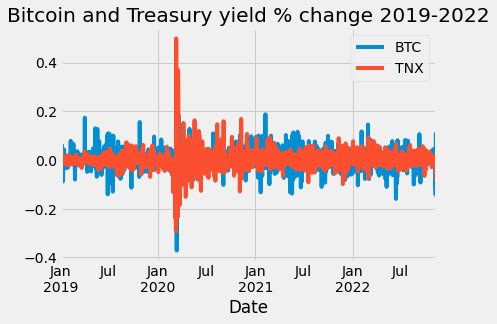

In [36]:
#Plot BTC & TNX price movement
data_adj['BTC'].plot()
data_adj['TNX'].plot()
plt.legend()
plt.title('Bitcoin and Treasury yield % change 2019-2022')

Text(0.5, 1.0, 'Covariance between indicators')

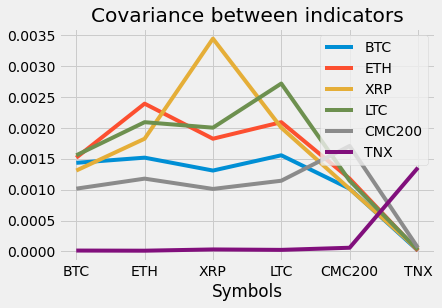

In [39]:
#Covariance of our transformed data
cov = data_adj.cov()


#Plot Covariance between indicators
cov.plot()
plt.legend()
plt.title('Covariance between indicators')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

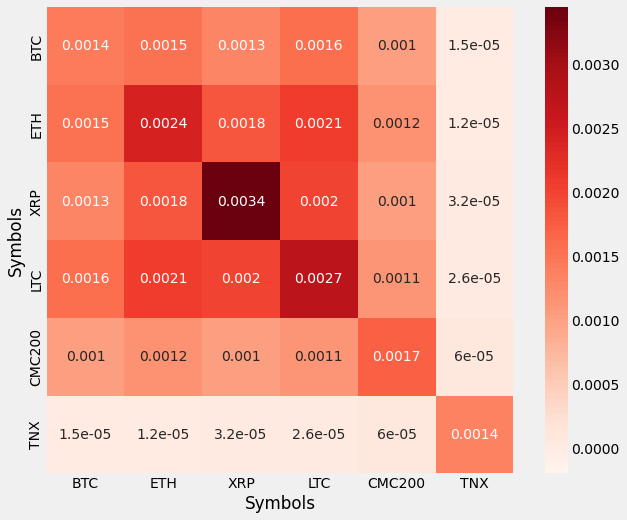

In [15]:
#Show the covariance bet
cov.iloc[:,-1:]


fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cov,vmin=-0.0002,
            cmap=sns.color_palette("Reds",100),
            square=True, ax=ax, annot=True)

Symbols       BTC       ETH       XRP       LTC    CMC200       TNX
Symbols                                                            
BTC      1.000000  0.819456  0.589059  0.788315  0.649453  0.010490
ETH      0.819456  1.000000  0.635552  0.820599  0.583125  0.006839
XRP      0.589059  0.635552  1.000000  0.654752  0.417202  0.015024
LTC      0.788315  0.820599  0.654752  1.000000  0.531393  0.013298
CMC200   0.649453  0.583125  0.417202  0.531393  1.000000  0.039474
TNX      0.010490  0.006839  0.015024  0.013298  0.039474  1.000000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

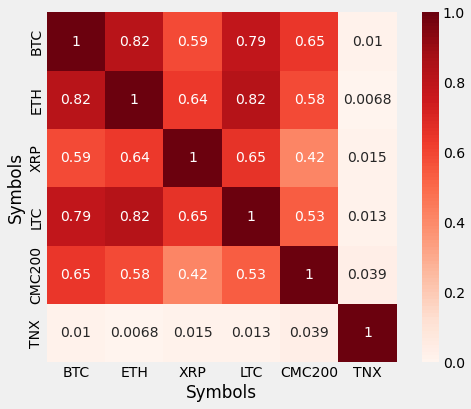

In [16]:
#Correlation and corresponding heatmap for our dataset
#Here the method of calculating the correlation is with Pearson's coefficient
#Pearson’s coefficient measures linear correlation

corr = data_adj.corr(method='pearson')

print(corr)

#The correlation between the 10yr treasury yield and other cryptocurrencies is very weak and shows negligible correlation.
#The interesting fact is if we compare BTC to other cryptos we see very high positive correlation.

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr,vmin=0,vmax=1,
            cmap=sns.color_palette("Reds",100),
            square=True, ax=ax, annot=True)

Text(0.5, 1.0, 'Correlation between indicators')

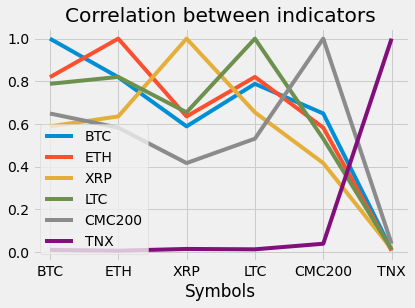

In [40]:
#Plot Correlation between indicators
corr.plot()
plt.legend()
plt.title('Correlation between indicators')

In [37]:
#Measuring correlation with the sperman method
#The Spearman's rank coefficient of correlation
#is a nonparametric measure of rank correlation (statistical dependence of ranking between two variables

data_adj.corr(method='spearman')


#As seen from the results the correlation between the 10yr treasury yield and other cryptocurrencies is very weak
#For them to be at least moderatily correlated, the Spearman correlation coefficient would have to be greater than 0.40 in absolute terms.
#We conclude that there is no significant correlation between interest rate hikes and cryptocurrency exchange rates


Symbols,BTC,ETH,XRP,LTC,CMC200,TNX
Symbols,,,,,,
BTC,1.000000,0.813132,0.688023,0.774048,0.658579,0.024437
ETH,0.813132,1.000000,0.739791,0.812379,0.615588,0.001995
XRP,0.688023,0.739791,1.000000,0.740752,0.514548,0.016231
LTC,0.774048,0.812379,0.740752,1.000000,0.552315,-0.005575
CMC200,0.658579,0.615588,0.514548,0.552315,1.000000,0.036803
TNX,0.024437,0.001995,0.016231,-0.005575,0.036803,1.000000
